# Proyecto: Machine Learning con Python
**Equipo 11**

- Ana Cristina Castillo Escobar
- Edgar Balderas Loranca
- José Alberto Cortes Ayala
- Leandro Marcelo Pantoja Acosta
- Luis Arturo Rosas León
- Marcos Yáñez Espíndola
---

## **Identificación del problema**

De acuerdo con la Organización Panamericana de la Salud (OPS) las enfermedades cardiovasculares son la principal causa de muerte a nivel mundial, se tiene estimado que alrededor de 1.9 millones de personas mueren por causa de algún padecimiento cardíaco (OPS, 2020). Además, las cardiopatías, los accidentes cerebrovasculares y otras enfermedades no transmisibles también se han posicionado como la mayores causantes de discapacidades, se calcula que estas afecciones en conjunto han hecho perder a la población mundial más de 100 millones de años de vida saludable (OPS, 2020)

El número elevado de muertes y de discapacidades causadas por estos problemas de salud es muy alarmante, más aún cuando se considera que la mayor parte de estas enfermedades cardiovasculares se pueden prevenir con una dieta saludable, ejercicio físico regular, uso nulo o moderado de alcohol o tabaco, entre otras (OPS, 2020).

Existen factores de riesgo que aumentan las probabilidades de ser víctima de una enfermedad cardiovascular. Analizar la relación entre los factores de riesgo y las muertes causadas por estos padecimientos podría ayudar a crear modelos de predicción que puedan identificar personas que deban tomar medidas de prevención para cuidar su vida y su salud.

**Referencias**

OPS.(2020). La OMS revela las principales causas de muerte y discapacidad en el mundo: 2000-2019. 18/09/2021. https://www.paho.org/es/noticias/9-12-2020-oms-revela-principales-causas-muerte-discapacidad-mundo-2000-2019 

OPS.(2020). Día Mundial del Corazón: Enfermedades cardiovasculares causan 1,9 millones de muertes al año en las Américas.18/09/2021. https://www3.paho.org/hq/index.php?option=com_content&view=article&id=7257:2012-dia-mundial-corazon-enfermedades-cardiovasculares-causan-1-9-millones-muertes-ano-americas&Itemid=4327&lang=fr

---

## **Recolección de datos**

Para este proyecto se utilizó una base de datos disponible en la página web Kaggle. El dataset se compone de datos selectos de los historiales clínicos de pacientes que murieron o sobrevivieron a afecciones cardíacas. La muestra se compone de 105 mujeres y 194 hombres de entre 40 y 95 años de edad.

El dataset cuenta con 13 columnas:
1. Edad (age).
2. Anemia (anaemia).
    - 1 = Verdadero.
    - 0 = Falso.
3. Creatina fosfoquinasa (creatinine_phosphokinase): nivel de esta enzima en la sangre (mcg/L).
4. Diabetes (diabetes).
      - 1 = Verdadero.
      - 0 = Falso.
5. Fracción de eyección (ejection_fraction): porcentaje de sangre que sale del corazón con cada contracción.
6. Presión sanguínea alta (high_blood_pressure).
      - 1 = Verdadero.
      - 0 = Falso.
7. Plaquetas (platelets): plaquetas en sangre (kiloplatelets/mL).
8. Suero de creatinina (serum_creatinine): nivel de suero de creatinina en sangre (mg/dL).
9. Sodio sérico (serum_sodium): nivel de sodio sérico en sangre (mEq/L).
10. Sexo binario (sex).
      - 1 = Hombre.
      - 0 = Mujer.
11. Fumar (smoking).
      - 1 = Verdadero.
      - 0 = Falso.
12. Periodo de seguimiento (time): periodo de seguimiento del paciente en días.
13. Evento de muerte (DEATH_EVENT): si el paciente murió durante el periodo de seguimiento.
      - 1 = Verdadero.
      - 0 = Falso

**Links para la descarga de los datos**

Heart Failure Prediction: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

---

## **Objetivo**

El objetivo de este proyecto es encontrar aquellas características que permitan predecir si un paciente sufrirá un padecimiento cardiovascular mortal. Esto es muy importante, ya que si el paciente recibe atención temprana, existe mayor posibilidad de que sobreviva. Este es un problema de clasificación que se puede resolver de manera efectiva y eficiente con *Machine Learning*, ya que a partir de los factores de riesgo se podrá predecir si el paciente entra en una de las dos posibles clasificaciones, supervivencia o muerte.



---

## **Preparativos**

In [ ]:
pip install scikit-plot

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
# Se importan las bibliotecas necesarias para realizar el proyecto
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report, confusion_matrix,
                            roc_curve, accuracy_score)
import scikitplot as skplt
#from pandas_profiling import ProfileReport
plt.style.use('seaborn-darkgrid')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16
%config InlineBackend.figure_formats = ['svg']

In [ ]:
import seaborn as sns

In [ ]:
# Se monta el Drive que contiene la base de datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

## **Exploración de datos**

In [ ]:
# Se carga la base de datos
datosCorazon= pd.read_csv('/content/drive/MyDrive/Bedu Equipo 18/Análisis Exploratorio de Datos con Python /heart_failure_clinical_records_dataset.csv')
datosCorazon.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
profile = ProfileReport(datosCorazon, title="Analisis Exploratorio")
profile

In [ ]:
# Se obtiene información de los datos contenidos en las columnas de la base de datos
datosCorazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# Se verifica que la base de datos no contenga ningún NaN
datosCorazon.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
# Se revisa que no haya ningún registro duplicado de pacientes
datosCorazon.duplicated().sum()

0

In [ ]:
# Se obtiene la media, la desviación estándar y los percentiles de cada una de las columnas
descripcion = datosCorazon.describe(percentiles=np.linspace(0,1,11))
# Se remueven las columnas con datos categóricos binários
descripcion.drop(columns=['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT'], inplace=True)
descripcion

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
0%,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
10%,45.000000,67.600000,25.000000,153000.000000,0.80000,132.000000,26.800000
20%,50.000000,100.200000,30.000000,196000.000000,0.90000,134.000000,59.600000
30%,53.000000,130.400000,30.000000,221000.000000,1.00000,135.000000,79.400000
40%,58.000000,176.800000,35.000000,237000.000000,1.00000,136.000000,95.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000


Para definir cuales son los factores de riesgo con mayor influencia en la muerte de los pacientes se observó la correlación entre las variables del *dataset*.

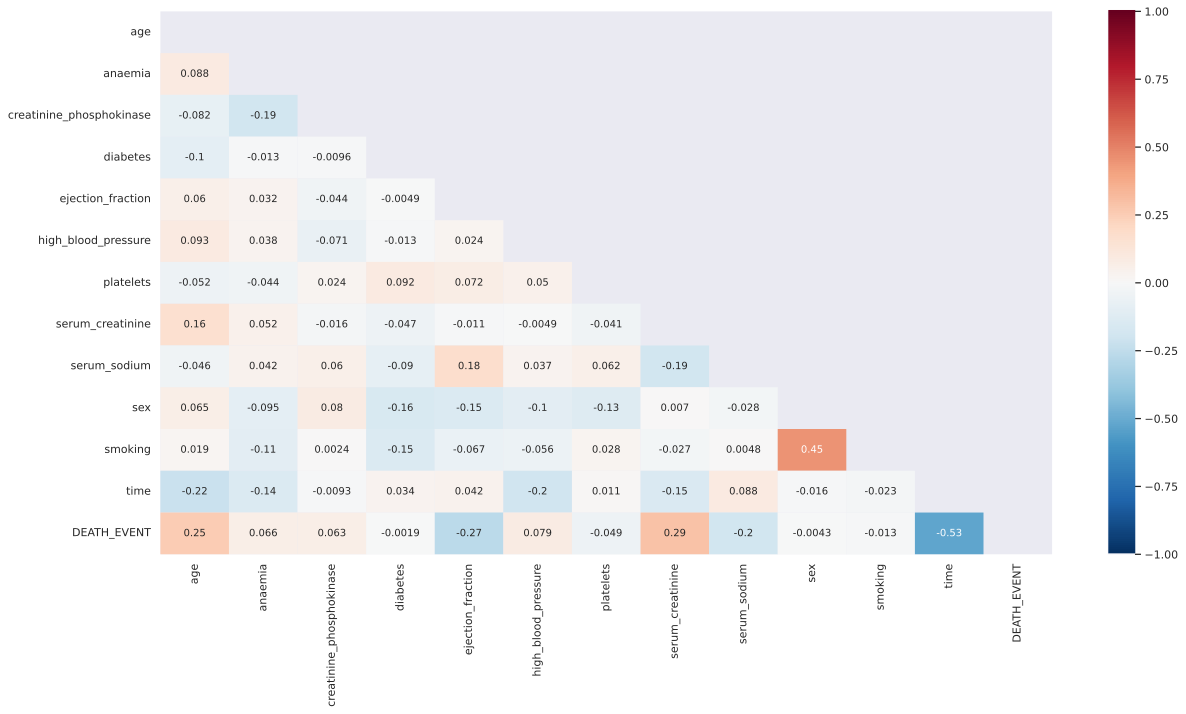

In [ ]:
corr = datosCorazon.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set(context ='poster', style="whitegrid")
sns.set(font_scale=1)
plt.figure(figsize = (20,10))
sns.heatmap(corr, annot=True,annot_kws={"size": 10}, cmap='RdBu_r', vmin=-1,vmax=1, mask=mask);

En este mapa de calor se puede ver que hay **cuatro** características que más aportan para "predecir" si una persona muere o no, entre ellas están: la edad, la fracción de eyección, los niveles de sodio y creatinina y el tiempo de seguimiento.

A continuación se evalua si la base de datos utilizada en este proyecto está balanceada.

In [ ]:
len(datosCorazon[datosCorazon['DEATH_EVENT']==1])

96

In [ ]:
len(datosCorazon[datosCorazon['DEATH_EVENT']==0])

203

In [ ]:
perc_muertos = len(datosCorazon[datosCorazon['DEATH_EVENT']==1])/len(datosCorazon)*100
print('Porcentaje de número de personas muertas','%1.2f %%'  % perc_muertos)

Porcentaje de número de personas muertas 32.11 %


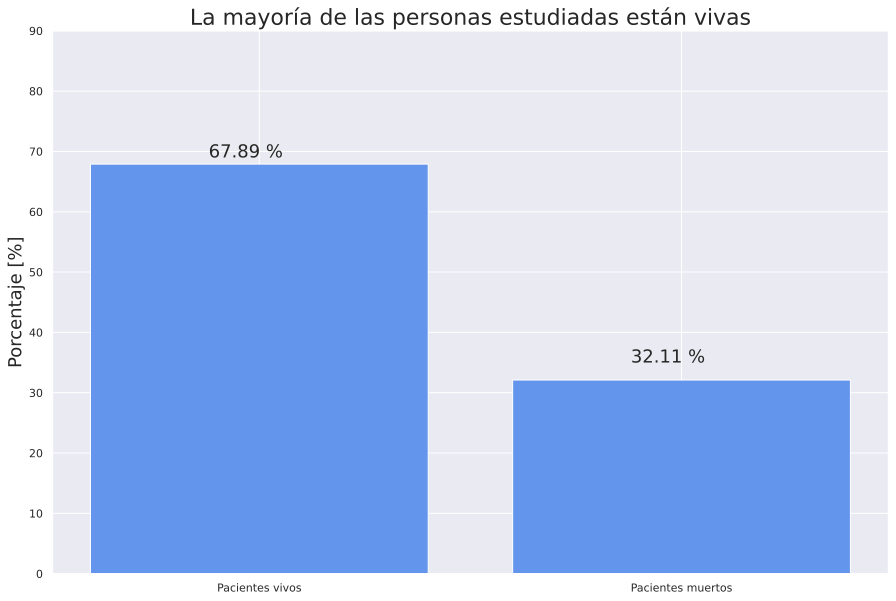

In [ ]:
perc_vivos = 100-perc_muertos
plt.figure(figsize=(15,10))
plt.bar(['Pacientes vivos', 'Pacientes muertos'], [perc_vivos, perc_muertos], color = 'cornflowerblue')
plt.title('La mayoría de las personas estudiadas están vivas', fontsize = 22)
plt.ylabel('Porcentaje [%]', fontsize = 18)
plt.ylim(0, 90)
plt.text(-0.12,69,'67.89 %', fontsize=18)
plt.text(0.88,35,'32.11 %', fontsize=18);
plt.show()

Que haya una mayor cantidad de pacientes vivos representa un problema para nuestro modelo, ya que éste podrá predecir mejor a las personas sobrevivientes a enfermedades cardíacas. Si se quiere predecir a las personas que mueren, es probable que se tengan que balancear los datos.

----

## **División del dataset y Regresión Logística** 

Se decidió tener una proporción del 80% para el entrenamiento, ya que al ser un dataset de solo 300 datos, se considero que tener una gran parte de datos para el entrenamiento podria mejorar el modelo. Se utilizó una regresión logística ya que este modelo es el más común para predecir el resultado de una variable categórica.

In [ ]:
x_features=['age','creatinine_phosphokinase','platelets','serum_creatinine',
            'serum_sodium','time','ejection_fraction','anaemia','diabetes','high_blood_pressure','sex','smoking']

In [ ]:
Y = datosCorazon['DEATH_EVENT']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,datosCorazon[x_features])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.372660
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.406     
Dependent Variable:    DEATH_EVENT        AIC:                246.8505  
Date:                  2021-11-07 04:41   BIC:                291.2558  
No. Observations:      299                Log-Likelihood:     -111.43   
Df Model:              11                 LL-Null:            -187.67   
Df Residuals:          287                LLR p-value:        4.5991e-27
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
age                       0.0523   0.0155  3.3869 0

In [ ]:
x_features=['age','creatinine_phosphokinase','serum_creatinine','ejection_fraction','time','sex']
logit_model=sm.Logit(Y,datosCorazon[x_features])
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.374276
         Iterations 7
                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.404     
Dependent Variable:    DEATH_EVENT        AIC:                235.8173  
Date:                  2021-11-07 04:47   BIC:                258.0199  
No. Observations:      299                Log-Likelihood:     -111.91   
Df Model:              5                  LL-Null:            -187.67   
Df Residuals:          293                LLR p-value:        6.3022e-31
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        7.0000                                           
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
age                       0.0534   0.0108  4.9461 0

In [ ]:
x_features = ['age','serum_creatinine','ejection_fraction','time']
x_train, x_test, y_train, y_test = train_test_split(datosCorazon[x_features], Y, test_size=0.2, random_state=69)
x_train = (x_train - x_train.mean())/x_train.std()
x_test = (x_test - x_test.mean())/x_test.std()

In [ ]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Haciendo las predicciones
y_hat = model.predict(x_test)

# Se ven las primeras 10 predicciones (sólo para comprobar que se tienen únicamentete valores de 0 y 1)
y_hat[:10]

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        40
           1       0.75      0.75      0.75        20

    accuracy                           0.83        60
   macro avg       0.81      0.81      0.81        60
weighted avg       0.83      0.83      0.83        60



In [ ]:
print("Accuracy:",accuracy_score(y_test, y_hat))

Accuracy: 0.8333333333333334


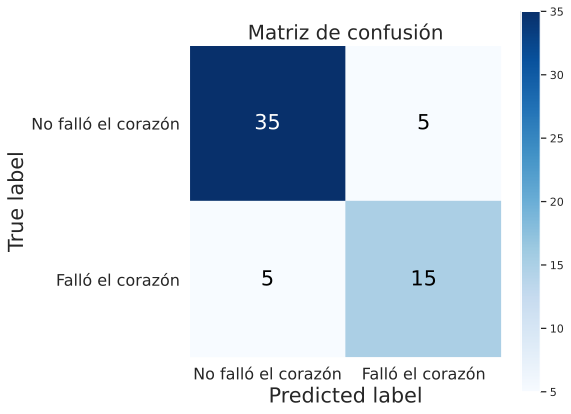

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat, normalize = False, figsize=(7,7),text_fontsize='xx-large')
plt.title('Matriz de confusión' , fontsize = 20);
plt.xticks(range(2), ["No falló el corazón","Falló el corazón"], fontsize=16)
plt.yticks(range(2), ["No falló el corazón","Falló el corazón"], fontsize=16);

De la matriz de confusión se puede observar que sí se predijo a más personas sobrevivientes que muertas, además nuestro modelo predice un número igual de falsos negativos (implica que nuestro modelo predijo que la persona estaba muerta, cuando está viva) y falsos positivos (implica que nuestro modelo colocó a personas vivas, cuando estaban muertas). Como tenemos pocas personas con falsos positivos, el modelo hizo relativamente bien su trabajo.

In [ ]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_hat))

Área bajo la curva ROC:  0.812


De la evaluación del modelo con la curva ROC se puede decir que el modelo no lo hizo perfecto, pero lo hizo bien, mayor a 0.5.

----------------------------------------

## **PCA**

Se realizó un análisis de componentes principales, esto con el fin de reducir la dimensionalidad de los datos.

In [ ]:
# Generar un nuevo data frame solo con las columnas que contienen númericos
df = datosCorazon.drop(columns=['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT'])
df

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8
...,...,...,...,...,...,...,...
294,62.0,61,38,155000.00,1.1,143,270
295,55.0,1820,38,270000.00,1.2,139,271
296,45.0,2060,60,742000.00,0.8,138,278
297,45.0,2413,38,140000.00,1.4,140,280


In [ ]:
# Analizar las varianzas de cada una de las variables
print('Varianza de cada variable')
df.var(axis=0)

Varianza de cada variable


age                         1.414865e+02
creatinine_phosphokinase    9.414586e+05
ejection_fraction           1.400635e+02
platelets                   9.565669e+09
serum_creatinine            1.070211e+00
serum_sodium                1.946996e+01
time                        6.023965e+03
dtype: float64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

Para que el modelo de PCA funciona de manera adecuada se deben de escalar los datos. Se utilizó un *pipeline* para esclara los datos que son introducidos en modelo de PCA.

In [ ]:
# Se entrena el modelo PCA con los datos escalados
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df)

# Se extrae el modelo entrenado
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
# Se verifica el número de componentes calculados
print(modelo_pca.n_components_)

7


In [ ]:
# Se convierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7']
)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
PC1,0.464962,-0.137959,-0.178892,-0.199258,0.511777,-0.447411,-0.480603
PC2,0.452132,-0.193893,0.681478,0.246786,0.045696,0.429720,-0.214286
PC3,-0.007800,0.815054,-0.106713,0.403317,0.101672,0.117976,-0.370565
PC4,-0.198092,-0.334406,-0.012995,0.820954,0.182265,-0.362607,0.100469
PC5,-0.191214,0.294822,0.469486,-0.180756,0.633580,-0.151399,0.446186
PC6,-0.634138,-0.100879,0.391348,-0.173305,-0.106913,-0.186519,-0.598569
PC7,-0.318422,-0.264833,-0.344178,-0.007459,0.528757,0.641912,-0.135358


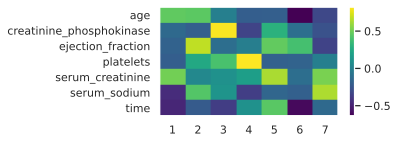

In [ ]:
# Se muestra de manera visual el peso de cada variable en cada uno de los componentes
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(df.columns)), df.columns)
plt.xticks(range(len(df.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

Se calculó el porcentaje de la varianza explicada por cada uno de los componentes principales.

Porcentaje de varianza explicada por cada componente
[0.21065323 0.16794163 0.14706845 0.13803225 0.12681915 0.10534895
 0.10413634]


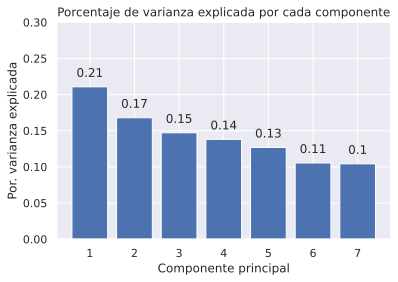

In [ ]:
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(df.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 0.3)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada')
plt.show()

Porcentaje de varianza explicada acumulada
[0.21065323 0.37859486 0.52566331 0.66369556 0.79051471 0.89586366
 1.        ]


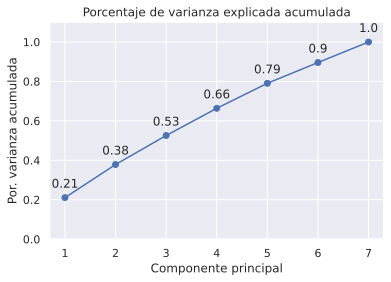

In [ ]:
# Porcentaje de varianza explicada acumulada
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('Porcentaje de varianza explicada acumulada')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

Se observó que el primer componente es el que explica mayor porcentaje de la varianza, sin embargo, éste sólo explica el 21%. Además, los siguientes componentes explican porcentajes bajos y muy similares, por lo que se necesitaría tomar en cuenta 5 de los 7 componentes para explicar 80% de la varianza. Esto no es ideal, ya que se pretendía reducir el número de componentes de manera significativa y esto no se logró.

---

## **K-Nearest-Neighbors**

Se pretendió analizar los datos con más modelos a parte de la regresión logística. Se inición con el modelo de *K-Nearest-Neighbors*, un algortimo supervisado de *Machine Learning* que también es apto para resolver problemas de clasificación.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

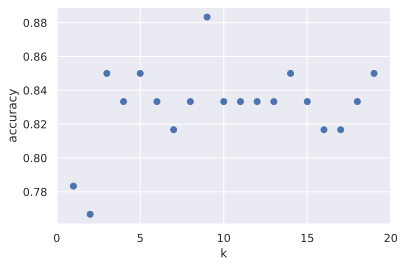

In [ ]:
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train, y_train)
    scores.append(knn.score(x_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
y_hat_knn = knn.predict(x_test)
print(classification_report(y_test,y_hat_knn))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        40
           1       0.84      0.80      0.82        20

    accuracy                           0.88        60
   macro avg       0.87      0.86      0.87        60
weighted avg       0.88      0.88      0.88        60



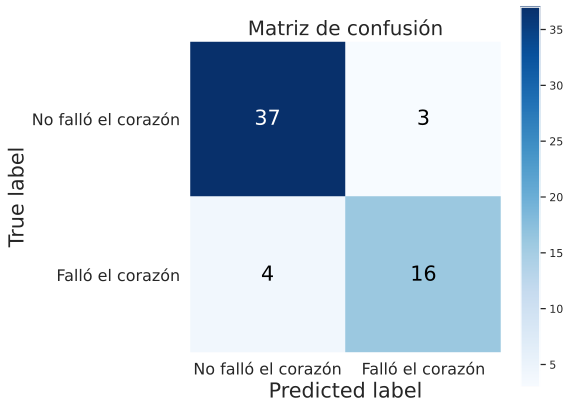

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat_knn, normalize = False, figsize=(7,7),text_fontsize='xx-large')
plt.title('Matriz de confusión' , fontsize = 20);
plt.xticks(range(2), ["No falló el corazón","Falló el corazón"], fontsize=16)
plt.yticks(range(2), ["No falló el corazón","Falló el corazón"], fontsize=16);

In [ ]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_hat_knn))

Área bajo la curva ROC:  0.863


En este caso el análisis de curvas ROC tuvo un valor más cercano a 1, lo que significa que este modelo tiene una mayor exactitud estadística. Además, tanto los falsos negativos como los falsos positivos disminuyeron.

---

## **Árbol de decisión**

Después se evaluaron la base de datos con un árbol de decisión, un modelo que permite llegar a un valor predecido a través de distintas decisiones tomadas con base en los datos recolectados.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV

In [ ]:
x_features_tree=['age','creatinine_phosphokinase','platelets','serum_creatinine',
                 'serum_sodium','time','ejection_fraction','anaemia','diabetes','high_blood_pressure','sex','smoking']
x_train, x_test, y_train, y_test = train_test_split(datosCorazon[x_features_tree], Y, test_size=0.2, random_state=69)

In [ ]:
param = {'max_depth':range(1,15), 'criterion':['gini','entropy']}
malla = GridSearchCV(DecisionTreeClassifier(), param, cv = 7)

In [ ]:
malla.fit(x_train,y_train);
malla.best_params_

{'criterion': 'gini', 'max_depth': 1}

In [ ]:
model_tree = malla.best_estimator_

In [ ]:
model_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=1, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

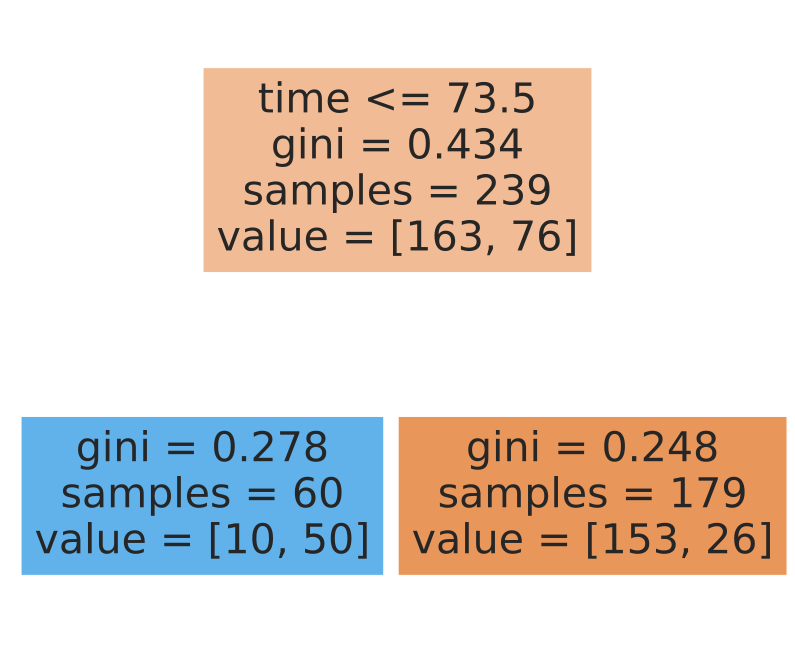

In [ ]:
plt.figure(figsize=(14,12))
plot_tree(model_tree, filled=True, feature_names= x_features_tree);

In [ ]:
y_hat_tree = model_tree.predict(x_test)
y_hat_tree[0:10]

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 1])

In [ ]:
print(classification_report(y_test,y_hat_tree))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        40
           1       0.81      0.65      0.72        20

    accuracy                           0.83        60
   macro avg       0.83      0.79      0.80        60
weighted avg       0.83      0.83      0.83        60



In [ ]:
print("Accuracy:",accuracy_score(y_test, y_hat_tree))

Accuracy: 0.8333333333333334


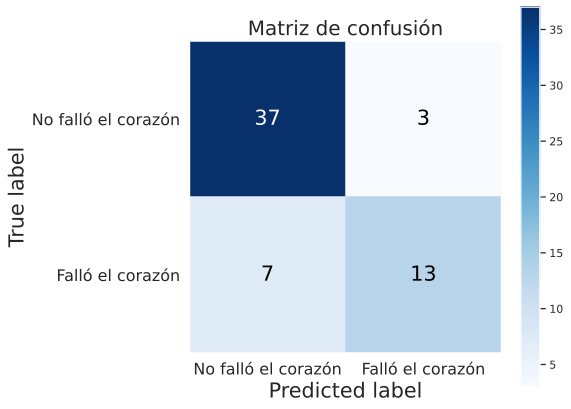

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat_tree, normalize = False, figsize=(7,7),text_fontsize='xx-large')
plt.title('Matriz de confusión' , fontsize = 20);
plt.xticks(range(2), ["No falló el corazón","Falló el corazón"], fontsize=16)
plt.yticks(range(2), ["No falló el corazón","Falló el corazón"], fontsize=16);

In [ ]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_hat_tree))

Área bajo la curva ROC:  0.787


En este caso el análisis de curvas ROC cayó por debajo del 0.8, lo cual no había pasado con los modelos anteriores. Adicionalmente, el número de falsos positivos aumentó más que en los otros casos.

---

## **Random Forest**

Este último modelo utiliza una multitud de árboles de decisiones para llegar a un valor predecido. El *output* de este modelo es la clasificación seleccionada por la mayoría de los árboles de decisiones.

In [ ]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_hat_random_forest=clf.predict(x_test)

In [ ]:
print(classification_report(y_test,y_hat_random_forest))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        40
           1       0.83      0.75      0.79        20

    accuracy                           0.87        60
   macro avg       0.86      0.84      0.85        60
weighted avg       0.87      0.87      0.86        60



In [ ]:
print("Accuracy:",accuracy_score(y_test, y_hat_random_forest))

Accuracy: 0.8666666666666667


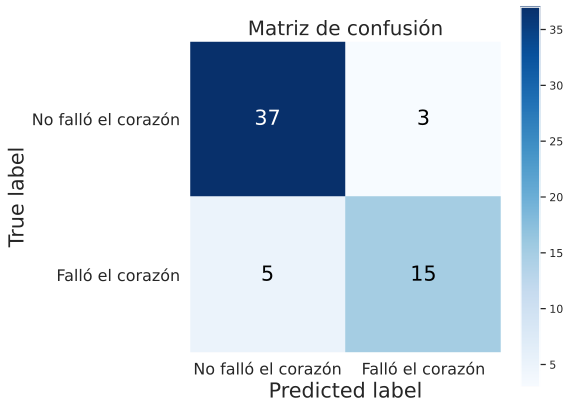

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_hat_random_forest, normalize = False, figsize=(7,7),text_fontsize='xx-large')
plt.title('Matriz de confusión' , fontsize = 20);
plt.xticks(range(2), ["No falló el corazón","Falló el corazón"], fontsize=16)
plt.yticks(range(2), ["No falló el corazón","Falló el corazón"], fontsize=16);

In [ ]:
print('Área bajo la curva ROC:',"% 1.3f" % roc_auc_score(y_test,y_hat_random_forest))

Área bajo la curva ROC:  0.838


De la evaluación del modelo con la curva ROC se puede concluir que este modelo es más exacto que un solo árbol de decisión, los resultados fueron cercanos a 1, pero aun así este modelo fue marginalmente inferior a *K-Nearest-Neighbors*.

Algo muy valioso que se pudo obtener de este modelo es una puntuación de la importancia de cada uno de los factores de riesgo para determinar si un paciente va a sufrir un evento cardíaco mortal.

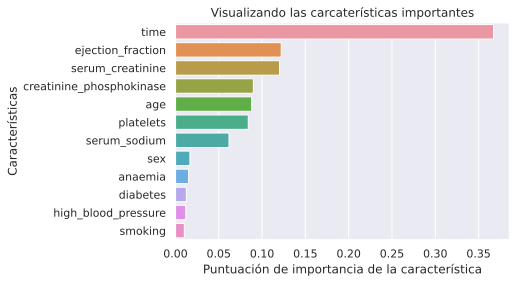

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=x_features_tree).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Puntuación de importancia de la característica')
plt.ylabel('Características')
plt.title("Visualizando las carcaterísticas importantes")
plt.show()

La variable con mayor importacia de acuerdo a este modelo fue el tiempo de seguimiento, lo cual tiene sentido ya que los pacientes con menor tiempo de seguimiento fueron los que murieron durante el estudio. Por otro lado, cabe remarcar la importancia de la fracción de eyección y los niveles de suero de creatinina. Estos dos factores de riesgo deben de monitorearse de manera detenida y precisa para evitar que un paciente muera a causa de una enfermedad cardiovascular.

---

## **Conclusión**

Se concluye que los factores de riesgo que más influyen en la predicción de la muerte de un paciente con problemas cardiovasculares son la fracción de eyección y los niveles de suero de creatinina. Estos dos parámetros deben de ser monitoreados por el médico a cargo del paciente.
Además, se determinó que el modelo más exacto para evaluar este problema de clasificación fue el de K-vecinos más cercanos, ya que tuvo un resultado de 0.863 en análisis de curvas ROC.

---